<a href="https://colab.research.google.com/github/hamzakhalid96/Simple-Linear-Regression/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, run the code cell below for a nicer layout.

In [1]:
%%html
<style>
h1 { margin-top: 3em !important; }
h2 { margin-top: 2em !important; }
h3 { margin-top: 1em !important; }
#notebook-container { 
    width: 50% !important; 
    min-width: 800px;
}
</style>

In [0]:
from google.colab import files 
import os 
from google.colab import drive

In [3]:
#files.upload()
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd '/content/gdrive/My Drive/resources'

/content/gdrive/My Drive/resources


<h1>World happiness 2017</h1>

The dataset `09-resources/world-happiness-2017.csv` contains the complete world happiness 
report from 2017. 

In [6]:
ls

world-happiness-2017.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

happy = pd.read_csv('/content/gdrive/My Drive/resources/world-happiness-2017.csv', index_col=0)
happy['GDP:Capita'] /= 2 # Normalize to [0,1]
happy['Family'] /= 2     # Normalize to [0,1]
happy.head()

,Rank,Score,GDP:Capita,Family,Life Expectancy,Freedom,Generosity,Corruption
Country,,,,,,,,
Norway,1,7.537,0.808232,0.766762,0.796667,0.635423,0.362012,0.315964
Denmark,2,7.522,0.741192,0.775561,0.792566,0.626007,0.355280,0.400770
Iceland,3,7.504,0.740317,0.805287,0.833552,0.627163,0.475540,0.153527
Switzerland,4,7.494,0.782490,0.758456,0.858131,0.620071,0.290549,0.367007
Finland,5,7.469,0.721786,0.770123,0.809158,0.617951,0.245483,0.382612


> 1) Normalize the column `Score` so that they lie in the interval $[0,1]$, 1 being the highest score and 0 being the lowest

> 2) Plot the six life factors (GDP:Capita, Family, Life Expectancy, Freedom, Generosity, Corruption) against the happiness score in scatter plots

> 3) Find out the Pearson correlation coefficient of the six life factors with the happiness score.

<i>Hint: Try out the pandas dataframe methods `.mean()`, `.cov()` and `.corr()`. </i>

> 4) Compute a simple linear regression for each of the plots and draw the regression line.

<i>Hint: Matplotlib does not offer a nice way to draw infinite lines. Instead, you can draw a line between two points $(x,y)$, $(x',y')$ on that line using `.plot([x,x'],[y,y'])`. </i>

In [0]:
import numpy as np 
import matplotlib.pyplot as  plt 
import seaborn as  sns 
from matplotlib.pyplot import plot 

In [9]:
# normalized Score column  between 0 and 1 
xnorm= (happy.Score - min(happy.Score))/ (max(happy.Score)- min(happy.Score))
xnorm

Country
Norway                      1.000000
Denmark                     0.996903
Iceland                     0.993187
Switzerland                 0.991123
Finland                     0.985962
                              ...   
Rwanda                      0.160611
Syria                       0.158753
Tanzania                    0.135425
Burundi                     0.043765
Central African Republic    0.000000
Name: Score, Length: 155, dtype: float64

In [0]:
happy.Score= xnorm 

In [11]:

happy.head()

,Rank,Score,GDP:Capita,Family,Life Expectancy,Freedom,Generosity,Corruption
Country,,,,,,,,
Norway,1,1.000000,0.808232,0.766762,0.796667,0.635423,0.362012,0.315964
Denmark,2,0.996903,0.741192,0.775561,0.792566,0.626007,0.355280,0.400770
Iceland,3,0.993187,0.740317,0.805287,0.833552,0.627163,0.475540,0.153527
Switzerland,4,0.991123,0.782490,0.758456,0.858131,0.620071,0.290549,0.367007
Finland,5,0.985962,0.721786,0.770123,0.809158,0.617951,0.245483,0.382612


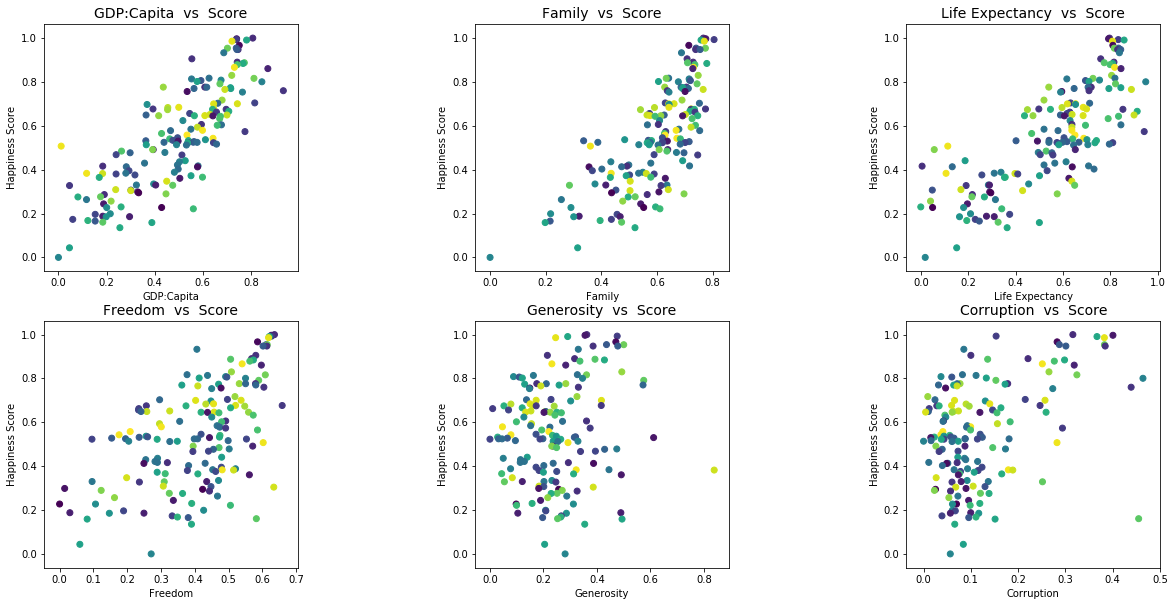

In [12]:
col=happy.columns[2:]

fig, axs = plt.subplots(2,3)
fig.set_size_inches(20,10)
fig.subplots_adjust(wspace=0.7)
r= np.random.rand(155)
colour= ['teal',]
for ax,c in zip(axs.ravel(),col):
  ax.set_xlabel(c)
  ax.set_ylabel('Happiness Score')
  ax.set_title(f'{c}  vs  Score', size='14')
  ax.scatter(happy[f'{c}'],happy.Score,c=r,cmap='viridis')
  #ax.legend([f'{c}'])

In [0]:
covari= happy.Freedom.cov(happy.Score)

In [14]:
#covariance  of score with other 6  factors 
covcol= happy.columns[2:]
covcol

Index(['GDP:Capita', 'Family', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption'],
      dtype='object')

In [15]:
print('Covariance of each  Life Factor with Score')
print()
for i in covcol:
  covari= happy[i].cov(happy.Score)
  print('|',i, " " * (15-len(i)),'|', covari)
  


Covariance of each  Life Factor with Score

| GDP:Capita       | 0.03992010581951398
| Family           | 0.025248724489042553
| Life Expectancy  | 0.04329200379447609
| Freedom          | 0.019971451270401258
| Generosity       | 0.004886763863083809
| Corruption       | 0.010186793862710144


In [16]:
#Covariance of whole dartaset
happy.cov()

,Rank,Score,GDP:Capita,Family,Life Expectancy,Freedom,Generosity,Corruption
Rank,2015.000000,-10.407225,-7.680622,-4.750166,-8.308298,-3.714081,-0.802366,-1.852028
Score,-10.407225,0.054537,0.039920,0.025249,0.043292,0.019971,0.004887,0.010187
GDP:Capita,-7.680622,0.039920,0.044267,0.020800,0.042052,0.011673,-0.000539,0.007506
Family,-4.750166,0.025249,0.020800,0.020630,0.020842,0.009156,0.001001,0.003385
Life Expectancy,-8.308298,0.043292,0.042052,0.020842,0.056203,0.012440,0.002019,0.006742
Freedom,-3.714081,0.019971,0.011673,0.009156,0.012440,0.022499,0.006390,0.007612
Generosity,-0.802366,0.004887,-0.000539,0.001001,0.002019,0.006390,0.018166,0.004031
Corruption,-1.852028,0.010187,0.007506,0.003385,0.006742,0.007612,0.004031,0.010335


In [17]:
print('Pearson Correlation of Life Factors with Score \n')
for i in covcol:
  covari= happy[i].cov(happy.Score)
  print('|',i, " " * (15-len(i)),'|',covari/np.sqrt((happy[i].cov(happy[i]) * happy.Score.cov(happy.Score))))

Pearson Correlation of Life Factors with Score 

| GDP:Capita       | 0.8124687538866421
| Family           | 0.7527366726961483
| Life Expectancy  | 0.7819506247990077
| Freedom          | 0.5701371935975075
| Generosity       | 0.15525583911274468
| Corruption       | 0.42907973722217185


In [18]:
# Pearson corelation of dataset using pandas 
happy.corr(method='pearson')

,Rank,Score,GDP:Capita,Family,Life Expectancy,Freedom,Generosity,Corruption
Rank,1.000000,-0.992774,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842
Score,-0.992774,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080
GDP:Capita,-0.813244,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944
Family,-0.736753,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841
Life Expectancy,-0.780716,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752
Freedom,-0.551608,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183
Generosity,-0.132620,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159
Corruption,-0.405842,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000


In [0]:
#  Model f(x) = ax +  b 

# a= sigxy/six^2 
# b = y - a-ax

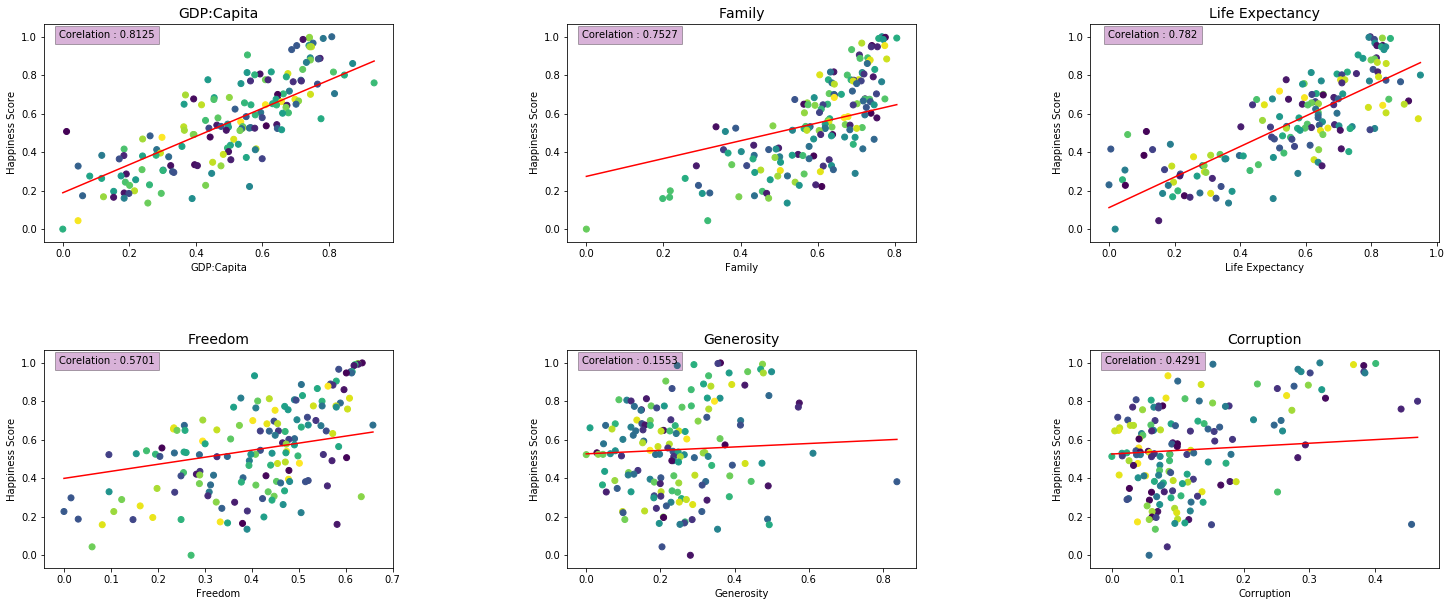

In [27]:
col=happy.columns[2:]

fig, axs = plt.subplots(2,3)
fig.set_size_inches(25,10)
fig.subplots_adjust(wspace=0.5,hspace=0.5)
colour= ['teal',]
for ax,c in zip(axs.ravel(),col):
  a=  happy[c].cov(happy.Score)/ happy.Score.cov(happy.Score)
  b= happy.Score.mean()- (a*happy[c].mean())
  y1=a*min(happy[c]) + b  
  y2=a*max(happy[c]) + b  
  x = np.array([min(happy[c]),max(happy[c])])
  y = np.array([y1,y2])
  ax.set_xlabel(c)
  ax.set_ylabel('Happiness Score')
  ax.set_title(f'{c}', size='14')
  ax.scatter(happy[f'{c}'],happy.Score,c=np.random.rand(155),cmap='viridis',label='Corelation')
  corelation= round(happy[c].corr(happy.Score),4)
  ax.plot(x,y,color='red')
  ax.text(0.18,0.95,'Corelation : ' + str(corelation),ha='center', va='center', transform=ax.transAxes,bbox=dict(facecolor='purple', alpha=0.3))
  
  